## Criando dataframe do exemplo da aula

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('ratings_toy.csv', names=['user', 'item', 'rating'])
df

## Mapeando usuários e itens para ids

In [ ]:
map_users = {user: idx for idx, user in enumerate(df.user.unique())}
map_items = {item: idx for idx, item in enumerate(df.item.unique())}
df['userId'] = df['user'].map(map_users)
df['itemId'] = df['item'].map(map_items)
df

### Funções para obter informações específicas do DataFrame

In [ ]:
# Obter a nota que um usuário deu para um item.
def get_rating(userId,itemId):
    if len(df[(df['userId']==userId)&(df['itemId']==itemId)]) == 0:
        return 0
    return (df.loc[(df.userId==userId) & (df.itemId == itemId),'rating'].iloc[0])

get_rating(1, 5)

2

In [ ]:
# Obter a lista de todos os itens que um usuário avaliou.
def get_item_ids(userId):
    if userId not in df['userId'].values:
        return []
    return (df.loc[(df.userId==userId),'itemId'].tolist())

get_item_ids(0)

[0, 1, 2, 3, 4, 5]

In [ ]:
# Obter o título do item dado o seu id.
def get_item_title(itemId):
    if itemId not in df['itemId'].values:
        return ''
    return (df.loc[(df.itemId == itemId),'item'].iloc[0])

get_item_title(0)

'The Princess Diaries'

In [ ]:
# Obter a lista de ratings de um usuário.
def get_user_ratings(userId):
    if userId not in df['userId'].values:
        return []
    return (df.loc[(df.userId==userId),'rating'].tolist())

get_user_ratings(0)

[5, 2, 4, 3, 2, 3]

In [ ]:
# Obter a média de ratings de um usuário
def get_user_mean(userId):
    return np.mean(get_user_ratings(userId))

get_user_mean(1)

3.5

In [ ]:
# Obter a lista de todos os usuários que avaliaram o item
def get_user_ids(itemId):
    if itemId not in df['itemId'].values:
        return []
    return (df.loc[(df.itemId==itemId),'userId'].tolist())

# Obter a média de notas do item
def get_item_mean(itemId):
    return np.mean(get_item_ratings(itemId))

# Obter todas as notas do item
def get_item_ratings(itemId):
    if itemId not in df['itemId'].values:
        return []
    return (df.loc[(df.itemId==itemId),'rating'].tolist())

get_item_ratings(2)

[4, 5, 3, 2]

## Método Baseline

In [ ]:
c = 1
global_mean = df['rating'].mean()
item_list = df['itemId'].unique()
item_bias = {}
for i in item_list:
    users = get_user_ids(i)
    item_bias[i] = sum((get_rating(u, i)-global_mean) for u in users) / (len(users) + c)

user_list = df['userId'].unique()
user_bias = {}
for u in user_list:
    items = get_item_ids(u)
    user_bias[u] = sum((get_rating(u, i)-global_mean-item_bias[i]) for i in items) / (len(items) + c)

print(user_bias)
print(item_bias)

pred = global_mean + user_bias[3] + item_bias[1]
pred

## Singular Value Decomposition

In [ ]:
rating_matrix = np.zeros((len(user_list), len(item_list)))
for u in user_list:
    for i in item_list:
        rating_matrix[u][i] = get_rating(u, i)
rating_matrix

In [ ]:
from scipy.sparse.linalg import svds

p, s, qt = svds(rating_matrix, k=3)
print(p)
print(s)
print(qt)

[-0.15566362 -0.02218797 -0.36289412  0.9184685 ]
[-0.10323606 -0.72659376  0.00485871  0.24793116  0.61127417 -0.16203165]
[-0.15566362226486707, -0.02218797494066885, -0.3628941233144, 0.9184685001323051, -0.10323605542626013, -0.7265937558871453, 0.004858713652787878, 0.2479311556887833, 0.6112741688236467, -0.1620316519549867]
['Jessica', 'Marta', 'Jose', 'Dave', 'The Princess Diaries', 'Oceans Eleven', 'The Lion King', 'Braveheart', 'Independence Day', 'Dumb and Dumber']


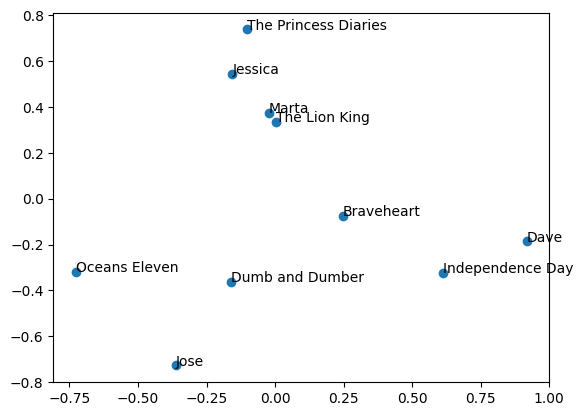

In [ ]:
import matplotlib.pyplot as plt


xpoints = list(p[:,0]) + list(qt[0,:])
ypoints = list(p[:,1]) + list(qt[1,:])
labels = list(df['user'].unique()) + list(df['item'].unique())

# prints added by Rafael
print(p[:,0])
print(qt[0,:])
print(xpoints)
print(labels)

fig, ax = plt.subplots()
ax.scatter(xpoints, ypoints)
for i, txt in enumerate(labels):
    ax.annotate(txt, (xpoints[i], ypoints[i]))

plt.show()

In [ ]:
s_diagonal_matrix = np.diag(s)
prediction_matrix = np.dot(np.dot(p, s_diagonal_matrix), qt)
prediction_matrix

array([[4.65512129, 2.33990199, 4.3884088 , 3.20115056, 2.06495117,
        2.25998953],
       [4.38863558, 2.61697256, 4.5623114 , 3.77332824, 2.92680808,
        2.83390013],
       [0.95915358, 5.04025699, 3.046002  , 4.02382368, 4.00769263,
        4.91235533],
       [0.93479912, 0.06426001, 2.07343045, 3.03802843, 4.01227931,
        1.86009766]])

## FunkSVD

### Importar base de dados

In [ ]:
# import wget
!pip install wget
!python3 -m wget https://github.com/mmanzato/MBABigData/raw/master/ml-20m-compact.tar.gz
!tar -xvzf ml-20m-compact.tar.gz


Saved under ml-20m-compact.tar (1).gz
dataset/
dataset/tags_sample.csv
dataset/._.DS_Store
dataset/.DS_Store
dataset/movies_sample.csv
dataset/._genome-tags.csv
dataset/genome-tags.csv
dataset/._ml-youtube.csv
dataset/ml-youtube.csv
dataset/._genome-scores.csv
dataset/genome-scores.csv
dataset/ratings_sample.csv


In [ ]:
movies = pd.read_csv('./dataset/movies_sample.csv')
ratings = pd.read_csv('./dataset/ratings_sample.csv')
df = ratings[['userId', 'movieId', 'rating']]
df = df.merge(movies[['movieId', 'title']])
df

,userId,movieId,rating,title
0,11,7481,5.0,Enemy Mine (1985)
1,359,7481,4.0,Enemy Mine (1985)
2,422,7481,3.0,Enemy Mine (1985)
3,424,7481,3.0,Enemy Mine (1985)
4,744,7481,3.0,Enemy Mine (1985)
...,...,...,...,...
190616,131651,118606,3.5,Dots (1940)
190617,134567,118606,3.5,Dots (1940)
190618,131651,96257,1.0,Heroic Purgatory (Rengoku eroica) (1970)
190619,131651,98337,4.0,97 Percent True (2008)


### Mapeamento de ids

In [ ]:
map_users = {user: idx for idx, user in enumerate(df.userId.unique())}
map_items = {item: idx for idx, item in enumerate(df.movieId.unique())}
df['userId'] = df['userId'].map(map_users)
df['movieId'] = df['movieId'].map(map_items)
map_title = {}

for _, row in df.iterrows():
    map_title[row.movieId] = row.title


### Divisão da base em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=.2, random_state=2)

### Treinamento do modelo

In [ ]:
def train_funksvd(train, n_factors, lr=0.05, reg=0.02, miter=10):
    global_mean = train['rating'].mean()
    n_users = df['userId'].max()+1
    n_items = df['movieId'].max()+1
    bu = np.zeros(n_users)
    bi = np.zeros(n_items)
    p = np.random.normal(0.1, 0.1, (n_users, n_factors))
    q = np.random.normal(0.1, 0.1, (n_items, n_factors))
    for f in range(n_factors):
        print(f)
        for t in range(miter):
            print(t)
            for index, row in train.iterrows():
                # print(index)
                u = row['userId']
                i = row['movieId']
                r_ui = row['rating']
                pred = global_mean + bu[u] + bi[i] + np.dot(p[u], q[i])
                e_ui = r_ui - pred
                bu[u] = bu[u] + lr * e_ui - reg*bu[u]
                bi[i] = bi[i] + lr * e_ui - reg*bi[i]
                temp_uf = p[u][f]
                p[u][f] = p[u][f] + lr * (e_ui * q[i][f]   - reg * p[u][f])
                q[i][f] = q[i][f] + lr * (e_ui * temp_uf - reg * q[i][f])
    return global_mean, bu, bi, p, q

In [ ]:
gl, bu, bi, p, q = train_funksvd(train, 2)

0
0
1
2
3
4
5
6
7
8
9
1
0
1
2
3
4
5
6
7
8
9


In [ ]:
test.head()

,userId,movieId,rating,title
31477,729,11,5.0,Masters of the Universe (1987)
148621,7294,61,3.0,Dangerous Minds (1995)
25190,7646,9,3.0,Bachelor Party (1984)
91518,991,25,2.5,Keeping the Faith (2000)
113446,394,33,3.5,North by Northwest (1959)


In [ ]:
pred = gl + bu[7646] + bi[9] + np.dot(p[7646], q[9])
pred

2.719794033138146

## SVD Otimizado

In [ ]:
from math import sqrt

def train_svdopt(train, n_factors, lr=0.05, reg=0.02, miter=5):
    global_mean = train['rating'].mean()
    n_users = df['userId'].max()+1
    n_items = df['movieId'].max()+1
    bu = np.zeros(n_users)
    bi = np.zeros(n_items)
    p = np.random.normal(0.1, 0.1, (n_users, n_factors))
    q = np.random.normal(0.1, 0.1, (n_items, n_factors))
    error = []
    for t in range(miter):
        print('t', t)
        sq_error = 0
        for index, row in train.iterrows():
            u = row['userId']
            i = row['movieId']
            r_ui = row['rating']
            pred = global_mean + bu[u] + bi[i] + np.dot(p[u], q[i])
            e_ui = r_ui - pred
            sq_error = sq_error + pow(e_ui, 2)
            bu[u] = bu[u] + lr * e_ui
            bi[i] = bi[i] + lr * e_ui
            for f in range(n_factors):
                # print('f', f)
                temp_uf = p[u][f]
                p[u][f] = p[u][f] + lr * (e_ui * q[i][f] - reg * p[u][f])
                q[i][f] = q[i][f] + lr * (e_ui * temp_uf - reg * q[i][f])
        error.append(sqrt(sq_error/len(train)))

    return global_mean, bu, bi, p, q, error

In [ ]:
gl, bu, bi, p, q, error = train_svdopt(train, 2, miter=10)

t 0
t 1
t 2
t 3
t 4
t 5
t 6
t 7
t 8
t 9


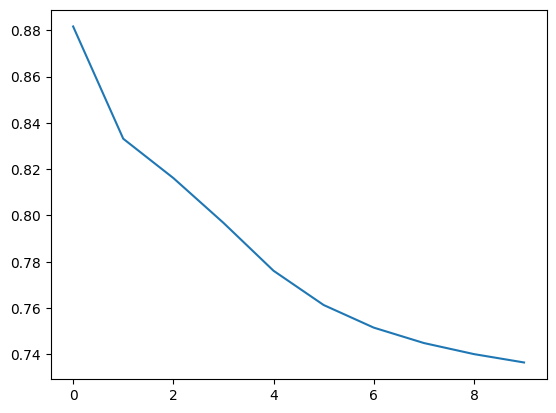

In [ ]:
plt.plot(error)
plt.show()

In [ ]:
test.head()

,userId,movieId,rating,title
31477,729,11,5.0,Masters of the Universe (1987)
148621,7294,61,3.0,Dangerous Minds (1995)
25190,7646,9,3.0,Bachelor Party (1984)
91518,991,25,2.5,Keeping the Faith (2000)
113446,394,33,3.5,North by Northwest (1959)


In [ ]:
pred = gl + bu[991] + bi[25] + np.dot(p[991], q[25])
pred

3.139159104224284